<a href="https://colab.research.google.com/github/reparadise/MachinelearningProjectAifel/blob/main/%EC%8A%A4%ED%8B%B0%EC%BB%A4%EC%95%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
print("🌫🛸")

🌫🛸


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os.path
print(os.path.expanduser('~'))

/root


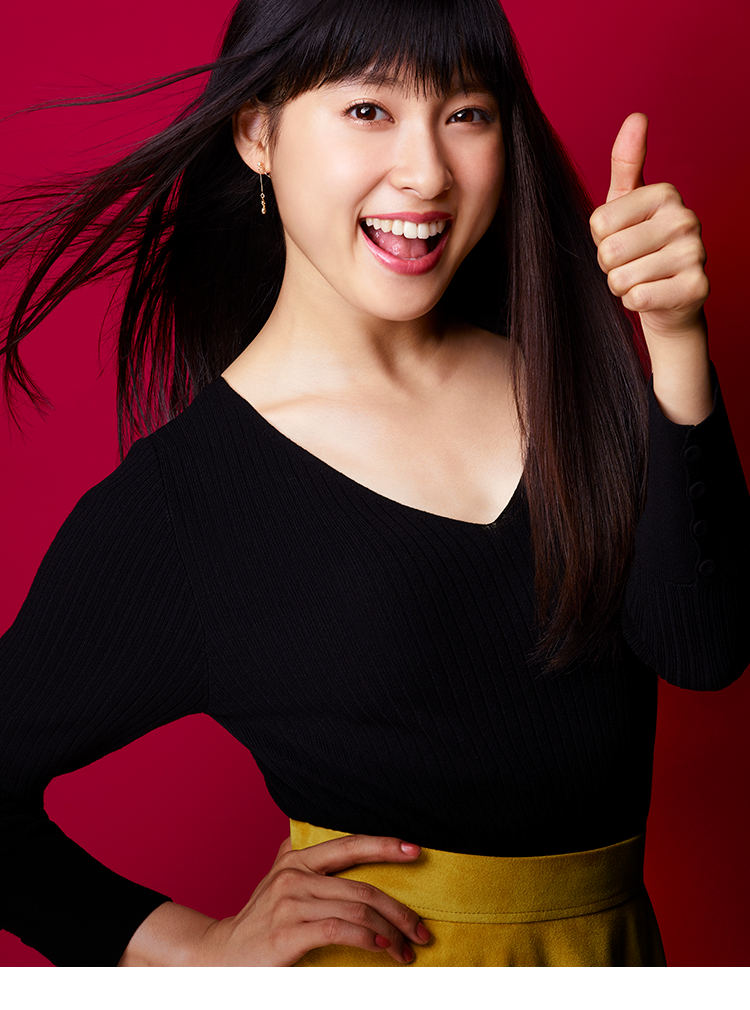

In [6]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
# def handle_image():
    #이미지 읽어오기
img_bgr='/content/drive/MyDrive/Colab Notebooks/tao-tsuchiya-daihatsunt.png'
img=cv2.imread(img_bgr, cv2.IMREAD_COLOR)
img_bgr= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_show= img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
cv2_imshow(img)
  
# if __name__=='__main__':
#     handle_image()
# 출처: https://kagus2.tistory.com/12 [컴공생 C:티스토리]

In [7]:
  #  my_image_path = os.getenv('HOME')+'/content/drive/MyDrive/Colab Notebooks/tao-tsuchiya-daihatsunt.png'
  #  img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
  #  img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
# plt.imshow(img_bgr)
# plt.show()

In [8]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
# img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
# plt.imshow(img_rgb)
# plt.show()

In [9]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()
print("🌫🛸")

🌫🛸


In [10]:
# detector_hog를 이용해서 얼굴의 bounding box를 추출합니다.
img_bgr='/content/drive/MyDrive/Colab Notebooks/tao-tsuchiya-daihatsunt.png' #에러나서 추가
img=cv2.imread(img_bgr, cv2.IMREAD_COLOR)   #추가
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #dlib은 rgb 이미지를 입력으로 받기 때문에 cvtColor() 를 이용해서 opencv 의 bgr 이미지를 rgb로 변환해 주었습니다
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(290, 23) (557, 290)]]


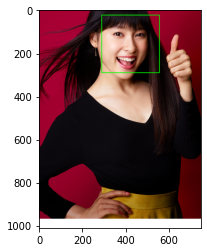

In [11]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
#img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show)
plt.show()

In [12]:
model_path ='/content/drive/MyDrive/Colab Notebooks/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [13]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


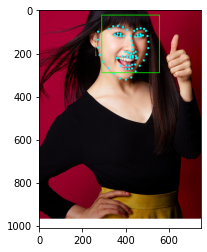

In [15]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 5, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show)
plt.show()
#찾은랜드마크 표시

In [17]:
type(landmark)

list

In [18]:
landmark[30][0]

434

In [19]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다, 좌표 출력
    x = landmark[30][0]
    y = landmark[30][1] #- dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(434, 183)
(x,y) : (434,183)
(w,h) : (268,268)


In [20]:
#스티커 사이즈 재입력
# w = 268
# h = 100

In [21]:
sticker_path = '/content/drive/MyDrive/Colab Notebooks/catpng.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(268, 268, 3)


In [22]:
refined_x = x - w // 4
refined_y = y - h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (367,-85)


In [23]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (367,0)


In [24]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

슝~


In [28]:
img_show

array([[[162,   0,  49],
        [163,   0,  49],
        [163,   0,  49],
        ...,
        [128,   0,  26],
        [129,   0,  27],
        [128,   0,  24]],

       [[161,   0,  48],
        [162,   0,  49],
        [161,   0,  49],
        ...,
        [127,   0,  24],
        [128,   0,  26],
        [129,   0,  26]],

       [[161,   0,  49],
        [162,   0,  48],
        [163,   0,  49],
        ...,
        [132,   0,  27],
        [129,   0,  27],
        [128,   0,  27]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [25]:
img_sticker.shape[0]

183

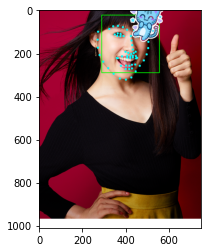

In [29]:
# plt.imshow(cv2.cvtColor(img_show,cv2.COLOR_BGR2RGB))
plt.imshow(img_show)
plt.show()

In [ ]:
# 회고.
lms code 및 블로그 코드 참조하여 작성. 복잡한 좌표계산식은 따라하기에서 만족하기로 